# Final Project: Parameter Mapping Sonification

# Group Members: James Nguyen, Julian Liaw

In [5]:
import librosa
import librosa.display
import pandas as pd
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import matplotlib.pyplot as plt
import IPython.display as ipd
import re
%matplotlib inline

# Load Data File


In [6]:
data = pd.read_csv('DATA/warriorsceltics.csv', low_memory=False)
data.head()

,Unnamed: 0,Date,Home Team,Away Team,Win or Loss for Celtics,Win or Loss for Warriors,Celtics score,Warriors score,Streak
0,0,"Mar 16, 2022",Warriors,Celtics,W,L,110,88,Celtics won 1
1,1,"Dec 17, 2021",Celtics,Warriors,L,W,107,111,Warriors won 1
2,2,"Apr 17, 2021",Celtics,Warriors,W,L,119,114,Celtics won 5
3,3,"Feb 2, 2021",Warriors,Celtics,W,L,111,107,Celtics won 4
4,4,"Jan 30, 2020",Celtics,Warriors,W,L,119,104,Celtics won 3


# Format for Audio Playback


In [7]:
import math

def normalize(x, dB):

    ampMax = numpy.amax(abs(x))
    ampTarget = math.pow(10, dB / 20)     
    normFactor = ampTarget / ampMax 
    # Return the normalized signal.
    return x * normFactor

def scale(x):

    ampMin = np.amin(x)
    ampMax = np.amax(x)
      
    scaleFactor = 1 / (ampMax - ampMin) 
    
    # Return the normalized signal.
    return (x - ampMin) * (scaleFactor)

In [8]:
# map the vector to a desired output range.

def mapToRange(x, lowP, highP):

    pFactors = scale(x)
    
    return pFactors*(highP - lowP) + lowP

# Export the Audio


In [9]:
x, sr = librosa.load('DATA/warriorsceltics.wav')
print(x.shape)
print(sr)
print(librosa.get_duration(x, sr))

(23475,)
22050
1.064625850340136


C:\Users\Narwh\AppData\Local\Temp\ipykernel_3712\2030000725.py:4: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.01249622 0.01017814 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(x, sr))


# Plot the Waveform


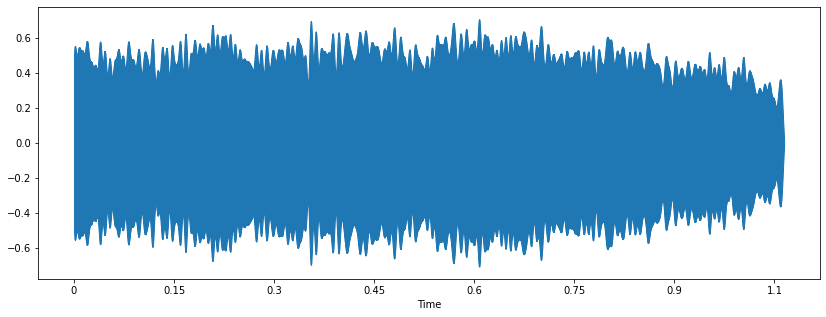

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# Feature Extraction

In [11]:
def extract_features(signal):
    return [
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.spectral_rolloff(signal)[0, 0],
        librosa.feature.spectral_contrast(signal)[0, 0],
    ]

In [12]:
audio_features = numpy.array([extract_features(x[i: i + 2048]) for i in range(0, len(x), 2048)]) 

NameError: name 'numpy' is not defined

# Feature 1: Spectral Centroid

In [13]:
plt.figure(figsize=(14, 5))
plt.hist(audio_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

NameError: name 'audio_features' is not defined

<Figure size 1008x360 with 0 Axes>

# Feature 2: Spectral Rolloff

In [14]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

C:\Users\Narwh\AppData\Local\Temp\ipykernel_3712\3608151521.py:1: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.01249622 0.01017814 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


C:\Users\Narwh\AppData\Local\Temp\ipykernel_3712\1087900744.py:2: FutureWarning: Pass y=[0.49642956 0.5007767  0.50497454 ... 0.02249622 0.02017814 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


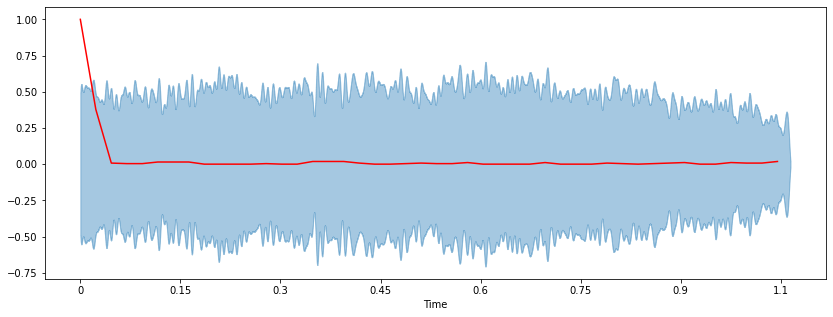

In [15]:
plt.figure(figsize=(14, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# Feature 3: Spectral Contrast

In [16]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
spectral_contrast.shape

C:\Users\Narwh\AppData\Local\Temp\ipykernel_3712\3656958463.py:1: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.01249622 0.01017814 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)


(7, 46)

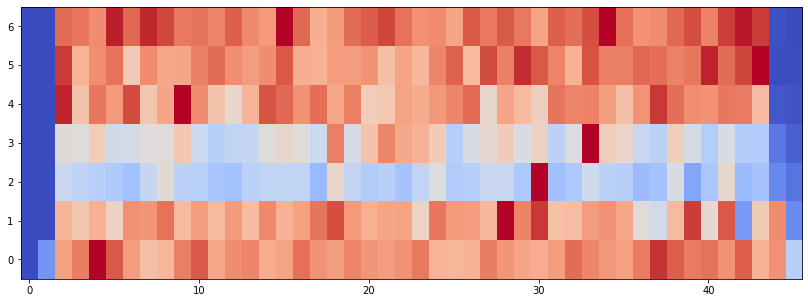

In [17]:
plt.figure(figsize=(14, 5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm',)

In [18]:

homeTeam = data.iloc[:, 2]
awayTeam = data.iloc[:, 3]
celticsWL = data.iloc[:, 4]
warriorsWL = data.iloc[:, 5]
celticsScore = data.iloc[:, 6]
warriorsScore = data.iloc[:, 7]
scoreDiff = celticsScore - warriorsScore
streaks = data.iloc[:,8]

In [58]:
celticsStreak = []
warriorsStreak = []
harmonyStreak = []
a=0
b=0
for x in celticsWL:
    if x == 'W':
        a += 1;
        b=0
        celticsStreak.append(a)
        warriorsStreak.append(b)
    if x == 'L':
        a = 0
        b += 1
        celticsStreak.append(a)
        warriorsStreak.append(b)
for a in celticsStreak:
    for b in warriorsStreak:
        if a > b:
            harmonyStreak.append(a)
        if a < b:
            harmonyStreak.append(b)
print(harmonyStreak)

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 4, 5, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 4, 1, 1, 1, 1, 2, 3, 4, 5, 1, 1, 1, 2, 1, 1, 2, 3, 4, 5, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 

In [66]:
pitches = mapToRange(warriorsScore, 48, 88)
amps = mapToRange(celticsScore, 0.05, 0.95)
tempos = mapToRange(warriorsScore, 100, 50)
#Using the difference in scores to map loudness, The louder the sound, the bigger the point gap
loudness = mapToRange(abs(scoreDiff), 0, 10)
#Using the score 
register = mapToRange(scoreDiff, 0, 10)
#Harmony, ordering data sets in accordance to streak by either team, the more consecutive the streaks, the better the harmony
harmony = mapToRange(harmonyStreak, 0 ,100)

In [67]:

print(harmony)

[ 0.          0.          0.         ... 25.         33.33333333
  0.        ]


In [70]:
file = open("DATA/SonScript.txt","a")

# clear the previous text file
file.truncate(0)

# initial note...
noteStrng = "0 pitch " + str(pitches[0]) + "; amp " + str(amps[0]) + "; tmpo " + str(tempos[0]) + "; harmony " +str(harmony[0])  + "; \n"
file.writelines(noteStrng)

# the rest of the note list
for indx in range(len(pitches)):
  i = indx;
  noteStrng = "250 pitch " + str(pitches[i]) + "; amp " + str(amps[i]) + "; tmpo " + str(tempos[i]) + "; harmony " +str(harmony[i])  + "; \n"
  file.writelines(noteStrng)

file.close()